In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [2]:
# Import the data
df = pd.read_csv("Starter_Code//myopia.csv")
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
#Identify target column
Y = df["MYOPIC"]

# Remove target column to create X
X= df.drop(columns=['MYOPIC'])

In [4]:
#scale data

X_scale = StandardScaler().fit_transform(X)


In [5]:
#Dimensionality Reduction with PCA
X_pca = PCA(n_components=0.9)
X_fit = X_pca.fit_transform(X_scale)
X_pca.explained_variance_ratio_


array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [6]:
sum(X_pca.explained_variance_ratio_)
#Covers what percentage of the original data?

0.9187361702915187

In [7]:
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=500)
tsne_features = tsne.fit_transform(X_fit)
tsne_features.shape

C:\Users\GMyer\anaconda3\envs\PythonData38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(618, 2)

In [8]:
# The first column of transformed features
X_plt = tsne_features[:,0]

# The second column of transformed features
Y_plt = tsne_features[:,1]

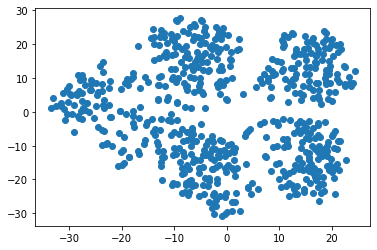

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X_plt, Y_plt)
plt.show()
#messed around with learning_rate until clusters seemed distinct

C:\Users\GMyer\anaconda3\envs\PythonData38\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


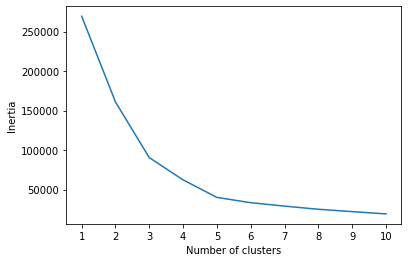

In [10]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [11]:
#Elbow appears at k=5

Based on the findings from the T-SNE and KMeans plots, I believe the patients can be clustered and would be best in approximately 5 clusters. This idea is backed by the forming of distinctive clusters in the T-SNE plot and the location of the elbow in the KMeans plot.